<a href="https://colab.research.google.com/github/JeremiasSchultz/Previsao_de_faturamento/blob/main/Assig18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive

In [163]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.decomposition import PCA, TruncatedSVD

#1. Importando Dados

In [7]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [8]:
link = '/content/gdrive/MyDrive/Colab Notebooks/assig18/heart.csv'
df_f = pd.read_csv(link,decimal=',')

In [9]:
df_f.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


#2. EDA

In [12]:
df_f.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
df_f.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df_f.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303,303.000000,303.000000,303.000000,303.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99,NaN,NaN,NaN,NaN
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,NaN,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,NaN,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,NaN,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,NaN,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,NaN,2.000000,1.000000,3.000000,1.000000


In [ ]:
!pip install pandas-profiling==2.7.1

In [14]:
from pandas_profiling import ProfileReport

In [16]:
profile = ProfileReport(df_f, minimal = True)

In [ ]:
profile

In [19]:
df_f.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,-0.257748,0.115739,0.206754,-0.436757
slope,-0.168814,-0.030711,0.119717,-0.121475,-0.004038,-0.059894,0.093045,0.386784,-0.257748,1.000000,-0.080155,-0.104764,0.345877


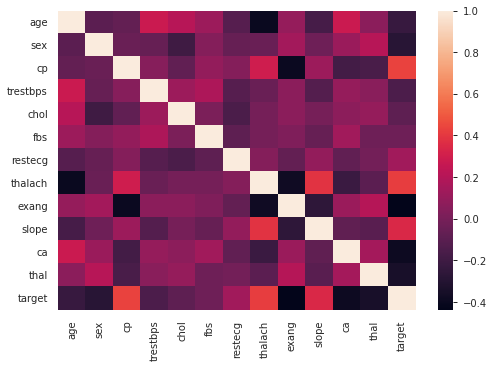

In [22]:
sns.heatmap(df_f.corr())

In [23]:
df_f.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
df_f.dtypes

age          int64
sex          int64
cp           int64
trestbps     int64
chol         int64
fbs          int64
restecg      int64
thalach      int64
exang        int64
oldpeak     object
slope        int64
ca           int64
thal         int64
target       int64
dtype: object

In [ ]:
df_f['oldpeak'] = df_f['oldpeak'].astype('float64')

In [31]:
df_f.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

#3. Modelo

In [32]:
X= df_f.drop(columns='target')
y= df_f['target'].reset_index(drop=True)

In [35]:
scaler = StandardScaler()

In [38]:
X_num = X.select_dtypes(['float64','int64'])

In [39]:
X_num.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [44]:
X_numscaler = scaler.fit_transform(X_num)

In [45]:
X_numscaler = pd.DataFrame(X_numscaler, columns = X_num.columns) 

In [47]:
X_numscaler.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [ ]:
y.nunique

#4. Separação Treino e Teste

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.20, random_state=10)

#5. Escolha do Modelo

In [102]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [122]:
models = {'RandomForestClassifier' : RandomForestClassifier(), #ok
          'KNeighborsClassifier': KNeighborsClassifier(), #ok
          'DecisionTreeClassifier' : DecisionTreeClassifier(), #ok
          'GradientBoostingClassifier' : GradientBoostingClassifier(), #ok
          'LogisticRegression' : LogisticRegression(),
          'SVC' : SVC()} #ok

for reg, modelo in zip(models.values(),models.keys()):
  regressor = reg
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  print(modelo)
  print(f"Acccuracy: {accuracy_score(y_test, y_pred)*100}%")
  print(f"Precision: {precision_score(y_test, y_pred)*100}%")
  print(f"Recall: {recall_score(y_test, y_pred)*100}%")
  print(f"F1: {f1_score(y_test, y_pred)*100}%")
  print('-----------------------------------')
  

RandomForestClassifier
Acccuracy: 77.04918032786885%
Precision: 70.0%
Recall: 80.76923076923077%
F1: 75.0%
-----------------------------------
KNeighborsClassifier
Acccuracy: 59.01639344262295%
Precision: 51.35135135135135%
Recall: 73.07692307692307%
F1: 60.317460317460316%
-----------------------------------
DecisionTreeClassifier
Acccuracy: 75.40983606557377%
Precision: 66.66666666666666%
Recall: 84.61538461538461%
F1: 74.57627118644068%
-----------------------------------
GradientBoostingClassifier
Acccuracy: 80.32786885245902%
Precision: 75.0%
Recall: 80.76923076923077%
F1: 77.77777777777779%
-----------------------------------
LogisticRegression
Acccuracy: 77.04918032786885%
Precision: 70.0%
Recall: 80.76923076923077%
F1: 75.0%
-----------------------------------
SVC
Acccuracy: 59.01639344262295%
Precision: 51.11111111111111%
Recall: 88.46153846153845%
F1: 64.78873239436619%
-----------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X_numscaler, y, test_size=0.20, random_state=10)

In [130]:
models = {'RandomForestClassifier' : RandomForestClassifier(), #ok
          'KNeighborsClassifier': KNeighborsClassifier(), #ok
          'DecisionTreeClassifier' : DecisionTreeClassifier(), #ok
          'GradientBoostingClassifier' : GradientBoostingClassifier(), #ok
          'LogisticRegression' : LogisticRegression(),
          'SVC' : SVC()} #ok

for reg, modelo in zip(models.values(),models.keys()):
  regressor = reg
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  print(modelo)
  print(f"Acccuracy: {accuracy_score(y_test, y_pred)*100}%")
  print(f"Precision: {precision_score(y_test, y_pred)*100}%")
  print(f"Recall: {recall_score(y_test, y_pred)*100}%")
  print(f"F1: {f1_score(y_test, y_pred)*100}%")
  print('-----------------------------------')

RandomForestClassifier
Acccuracy: 80.32786885245902%
Precision: 73.33333333333333%
Recall: 84.61538461538461%
F1: 78.57142857142856%
-----------------------------------
KNeighborsClassifier
Acccuracy: 85.24590163934425%
Precision: 77.41935483870968%
Recall: 92.3076923076923%
F1: 84.21052631578947%
-----------------------------------
DecisionTreeClassifier
Acccuracy: 78.68852459016394%
Precision: 69.6969696969697%
Recall: 88.46153846153845%
F1: 77.96610169491525%
-----------------------------------
GradientBoostingClassifier
Acccuracy: 80.32786885245902%
Precision: 75.0%
Recall: 80.76923076923077%
F1: 77.77777777777779%
-----------------------------------
LogisticRegression
Acccuracy: 77.04918032786885%
Precision: 70.0%
Recall: 80.76923076923077%
F1: 75.0%
-----------------------------------
SVC
Acccuracy: 81.9672131147541%
Precision: 74.19354838709677%
Recall: 88.46153846153845%
F1: 80.70175438596492%
-----------------------------------


#6. Hiperparametrização

In [107]:
from sklearn.model_selection import GridSearchCV

In [157]:
parameters = {'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': [15,30,45,60] , 'p': [3,4]} 
reg = KNeighborsClassifier()
grd = GridSearchCV(reg, parameters, scoring = 'f1', n_jobs= -1)
grd.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [15, 30, 45, 60], 'p': [3, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [158]:
clf_best = grd.best_estimator_ 
clf = KNeighborsClassifier()
clf_best.fit(X_train, y_train)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [159]:
y_pred = clf.predict(X_test)

In [160]:
  print(f"Acccuracy: {accuracy_score(y_test, y_pred)*100}%")
  print(f"Precision: {precision_score(y_test, y_pred)*100}%")
  print(f"Recall: {recall_score(y_test, y_pred)*100}%")
  print(f"F1: {f1_score(y_test, y_pred)*100}%")

Acccuracy: 85.24590163934425%
Precision: 77.41935483870968%
Recall: 92.3076923076923%
F1: 84.21052631578947%


In [161]:
y_pred = clf_best.predict(X_test)

In [162]:
  print(f"Acccuracy: {accuracy_score(y_test, y_pred)*100}%")
  print(f"Precision: {precision_score(y_test, y_pred)*100}%")
  print(f"Recall: {recall_score(y_test, y_pred)*100}%")
  print(f"F1: {f1_score(y_test, y_pred)*100}%")

Acccuracy: 80.32786885245902%
Precision: 71.875%
Recall: 88.46153846153845%
F1: 79.3103448275862%


#PCA

In [167]:
pca = PCA(n_components=2)
x = pca.fit(X_train).transform(X_train)

In [169]:
pca.explained_variance_

array([2.76057574, 1.53094808])